In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt 
%matplotlib inline

<b>Exercise:</b> Let $S$ be the set of all $n\times n$ matrices $A$ whose elements are either 0 or 1.  (Thus, there are $2\times 2$ matrices in $S$).

The pair ofelements $a_{i,j}$ and $a_{r,s}$ of the matrix $A$ are said to be neigbors if $|r−i|+|s−j|= 1$.

Let $N$ denote all the pairs of neighboring elements of $A$. The “Ising energy” of the matrix $A$ is defined by,

$$H(A) = -\sum_{\mathcal{N}}a_{i,j}a_{r,s}$$ 

where  the  sum  is  over  all  the  pairs  of  neighboring  elements.

Give  a  method  for randomly choosing such a matrix $A$ according to the probability mass function:
$$P(A) = \frac{\exp(−λH(A))}{\sum_{A\in S}\exp(−\lambda H(A))}, \ A\in S$$

where $\lambda$ is  a  specified  positive  constant.

___

O método para escolher a matriz $A$ aleatoriamente será utilizando o algoritmo de Metropolis.

A ideia será começar com uma matriz $X^{(0)}$ arbitrária, e a cada iteração criar uma matrix $Y_t$ aleatoriamente. 

Valendo-se do princípio que o algoritmo de Metropolis-Hasting é capaz de realizar amostragens de uma função de distribuição de probabilidades $f$ a menos de uma constante, então a seguinte função, 

$$f(A)=p(A)=\frac{e^{-\lambda H(A)}}{\sum_{A\in S}e^{-\lambda H(A)}}$$

Que seria extremamente custosa para se calcular, pois teríamos de gerar $2^{n^2}$ matrizes, pode ser gerada valendo-se da razão de aceitação do algoritmo de Metropolis, dada por,

$$\alpha = min\left(1, \frac{f(A)}{f(B)}\right) = min\left(1, \frac{e^{-\lambda H(A)}}{e^{-\lambda H(B)}}\right)$$


Sendo assim, definimos nosso estado inicial $X^{(0)}$ com uma matriz $A_{n\times n} = \{a_{ij} = 0, \forall i,j=1,...,n \}$.

Depois, geramos uma matriz $Y_t$, em que escolhemos duas variáveis aleatórias $i, j \sim U(0, n)$, para escolhermos uma linha e uma coluna da matriz aleatoriamente, e fazemos que $y_{ij} \sim $ Bernoulli(0.5), permitindo que esse valor também seja mudado com aleatoridade.

Sendo assim, conseguimos definir uma cadeia de Markov, uma vez que $X^{(t+1)}$ dependerá de $X^{(t)}$, pois $X^{(t+1)}$ é uma matriz que difere de $X^{(t)}$ em no máximo um elemento.

In [257]:
def H(A):
    neighbors = {}
    for i in range(len(A)):
        for j in range(len(A[i])):
            neighbors[(i,j)] = []
    hA = 0
    for (i,j) in neighbors:
        for r in range(0,len(A)):
            for s in range(0,len(A[i])):
                if abs(r-i) + abs(s-j) == 1:
                    hA+=A[i][j]*A[r][s]
    hA = -hA/2
    return hA

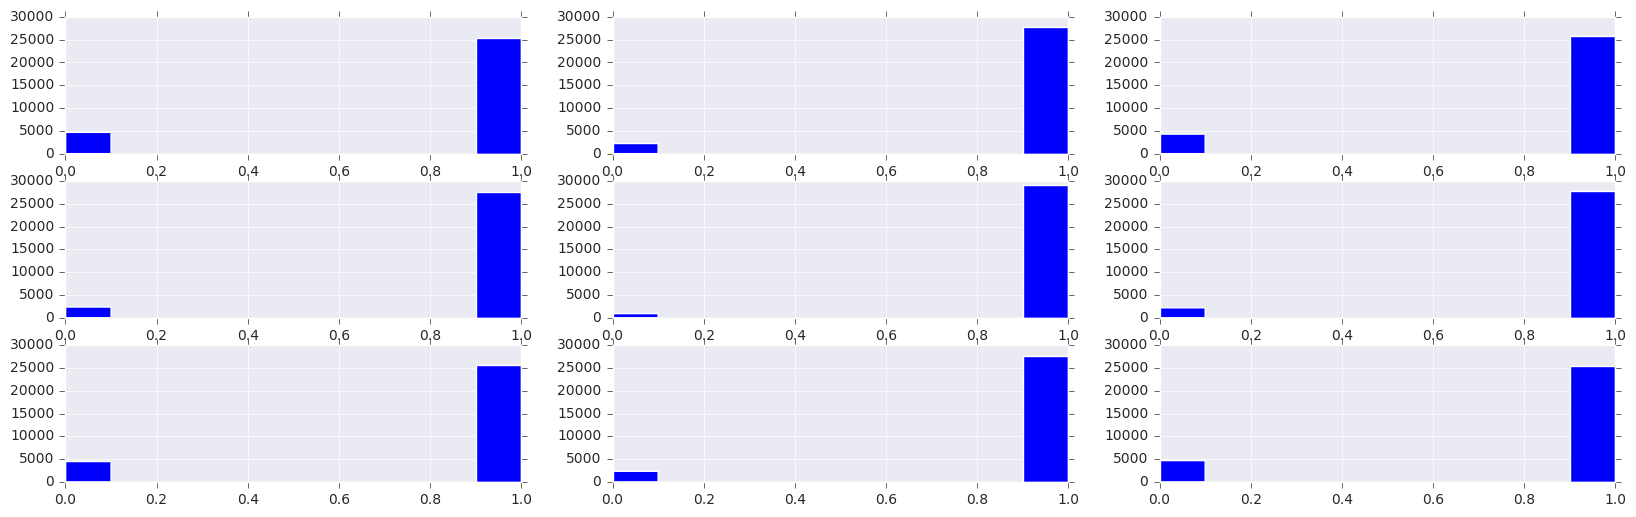

In [274]:
from copy import deepcopy

def f(A, lamb=1):
    hA = H(A)
    return np.exp(-lamb*hA)

X_init = [[0,0,0],
          [0,0,0],
          [0,0,1]]

N = 30000 # numero de simulacoes
X = [0 for i in range(N)]
X[0] = X_init
for i in range(1, N):
    # Escolho uma amostra Y tal que:  I, J ~ Unif(0,N) e Y[I][J] ~ Bernoulli(0.5)
    u1, u2 = np.random.randint(0,len(X[i-1])), np.random.randint(0,len(X[i-1]))
    Y = deepcopy(X[i-1])
    Y[u1][u2] = np.random.binomial(1, 1/2)

    # Agora vem o processo de decisão do algoritmo Metropolis
    u = np.random.uniform(0,1)
    if u < min(1, f(Y)/f(X[i-1])):
        X[i] = Y
    else:
        X[i] = X[i-1]
        
# plot frequencies of 0's and 1's for the flattening of the matrix, ie, [[a11,a12],[a21,a22]] -> [a11,a12,a21,a22]
a,b,c,d,e,f,g,h,i = [],[],[],[],[],[],[],[],[]
for x in X:
    k = np.array(x).reshape(1,9)[0]
    a.append(k[0]);b.append(k[1]);c.append(k[2])
    d.append(k[3]);e.append(k[4]);f.append(k[5])
    g.append(k[6]);h.append(k[7]);i.append(k[8])
    
fig, ax = plt.subplots(3,3)
fig.set_size_inches(20,6)
ax[0][0].hist(a);ax[0][1].hist(b);ax[0][2].hist(c)
ax[1][0].hist(d);ax[1][1].hist(e);ax[1][2].hist(f)
ax[2][0].hist(g);ax[2][1].hist(h);ax[2][2].hist(i)
plt.show()